# Data Review and Scrubbing

In [1]:
# Import necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
# Create pd dataframes from csv files
df = pd.read_csv('../DATA/data.csv')
df_artist = pd.read_csv('../DATA/data_by_artist.csv')
df_genre = pd.read_csv('../DATA/data_by_genres.csv')
df_year = pd.read_csv('../DATA/data_by_year.csv')
df_genre_2 = pd.read_csv('../DATA/data_w_genres.csv')

## Some info on dataframes from [Spotify API website](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features)

### Content
The "data.csv" file contains more than 170.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

### Primary:
- id 
    - Id of track generated by Spotify
### Numerical:
- acousticness (Ranges from 0 to 1): The positiveness of the track
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability (Ranges from 0 to 1)
    - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy (Ranges from 0 to 1)
    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- duration_ms (Integer typically ranging from 200k to 300k)
    - The duration of the track in milliseconds.
- instrumentalness (Ranges from 0 to 1)
    - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- valence (Ranges from 0 to 1)
    - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- popularity (Ranges from 0 to 100)
    - The popularity of the album. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated from the popularity of the album’s individual tracks.
- tempo (Float typically ranging from 50 to 150)
    - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- liveness (Ranges from 0 to 1)
    - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness (Float typically ranging from -60 to 0)
    - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness (Ranges from 0 to 1)
    - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- year 
    - Ranges from 1921 to 2020
### Dummy:
- mode (0 = Minor, 1 = Major)
    - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11
    - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- artists (List of artists mentioned)
    - The artists of the album. Each artist object includes a link in href to more detailed information about the artist.
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.
- name 
    - The name of the album. In case of an album takedown, the value may be an empty string.

## Reviewing the datasets

### Reviewing and cleaning df dataframe
From Kaggle Website:
"This csv file contains the data mentioned in the description. Each row represents a single track, each column represents a field of the track (audio features and identifiers)"

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Looking for null values in dataset
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
df.shape

(170653, 19)

In [7]:
# Remove unnecessary columns
df = df.drop(labels = ['mode', 'release_date', 'explicit'], axis=1)
df.shape

(170653, 16)

In [8]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.167010,5.199844,0.205839,-11.467990,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.313475,3.515094,0.174805,5.697943,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,2.000000,0.098800,-14.615000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000216,5.000000,0.136000,-10.580000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.102000,8.000000,0.261000,-7.183000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,11.000000,1.000000,3.855000,100.000000,0.970000,243.507000


In [9]:
def basic_plots(data):
    # Create hist plot
    data.hist(figsize=(15,15))
    plt.show()
    
    # Create heatmap
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    corr = data.corr()
    sns.heatmap(corr, annot=True)

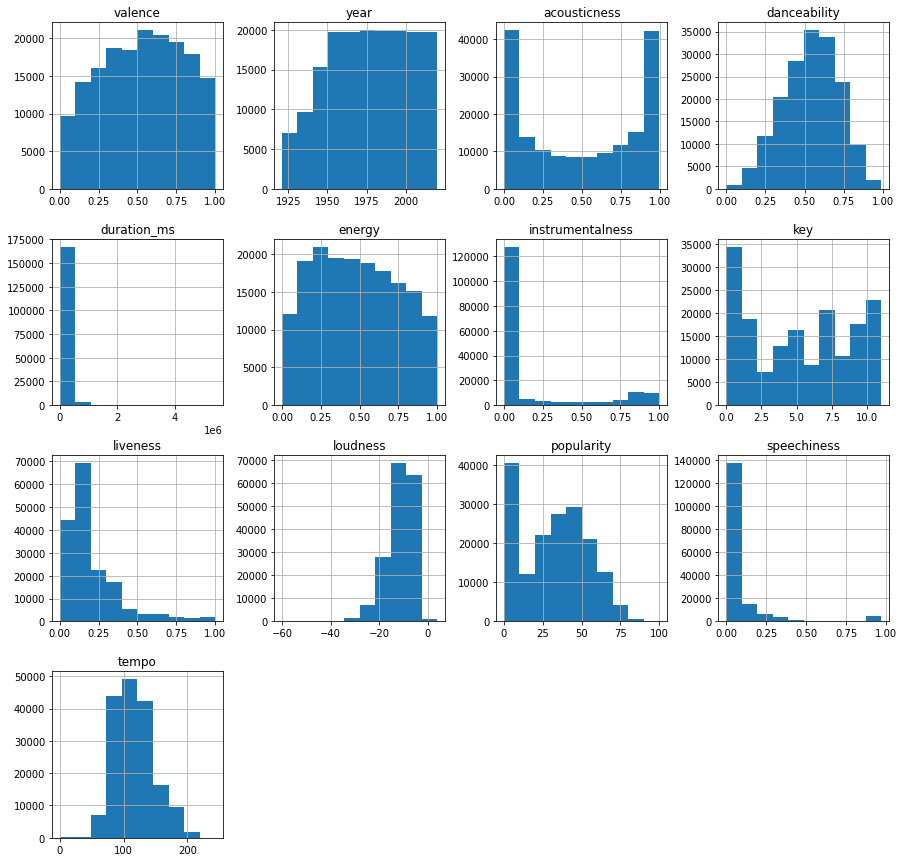

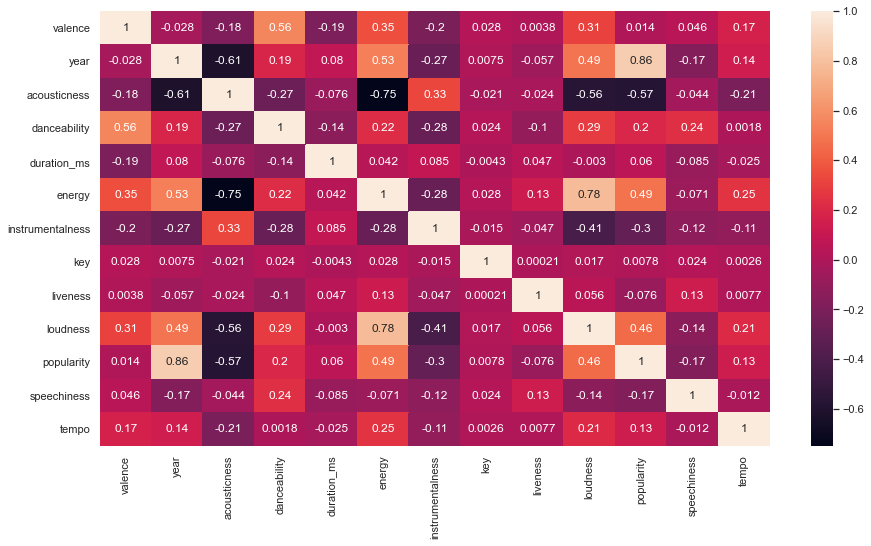

In [10]:
basic_plots(df)

### Reviewing and cleaning df_artist dataframe
From Kaggle Website:

"This file contains the audio features of each artist, resulted from the aggregation. The rows represent different artists, columns represent different audio features
(The original data.csv file is grouped by artists of the tracks, and this csv file is the result of the aggregation process.)"

In [11]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [12]:
# Looking for null values in dataset
df_artist.isna().sum()

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [13]:
df_artist.shape

(28680, 15)

In [14]:
# Remove unnecessary columns
df_artist = df_artist.drop(labels = ['mode'], axis=1)
df_artist.shape

(28680, 14)

In [15]:
df_artist.describe()

,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


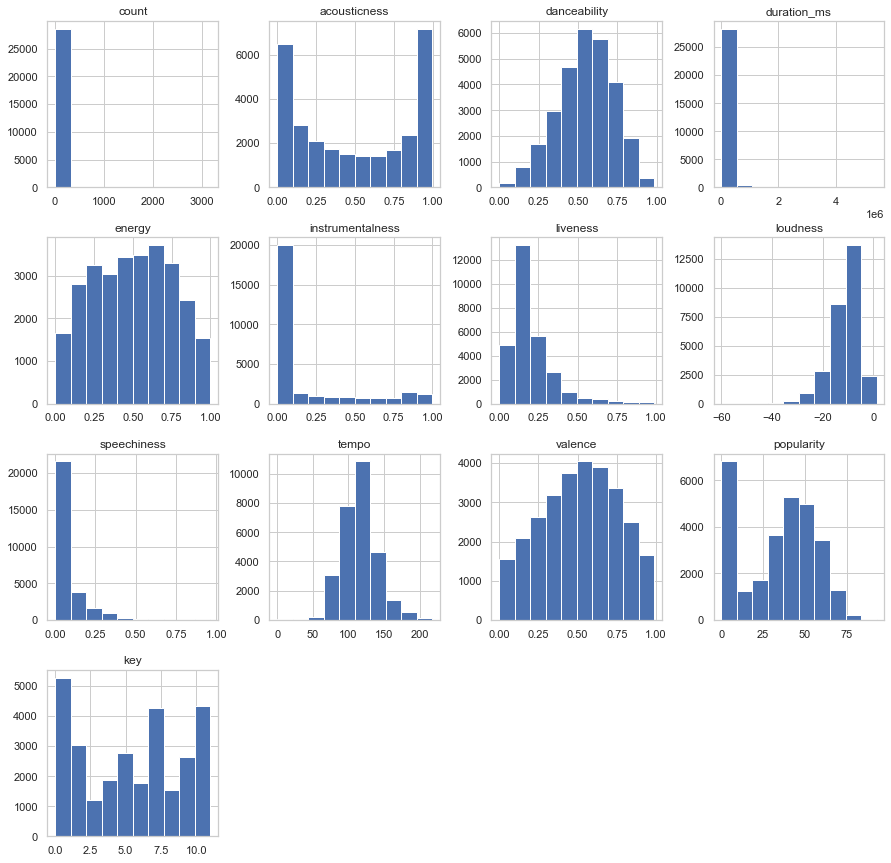

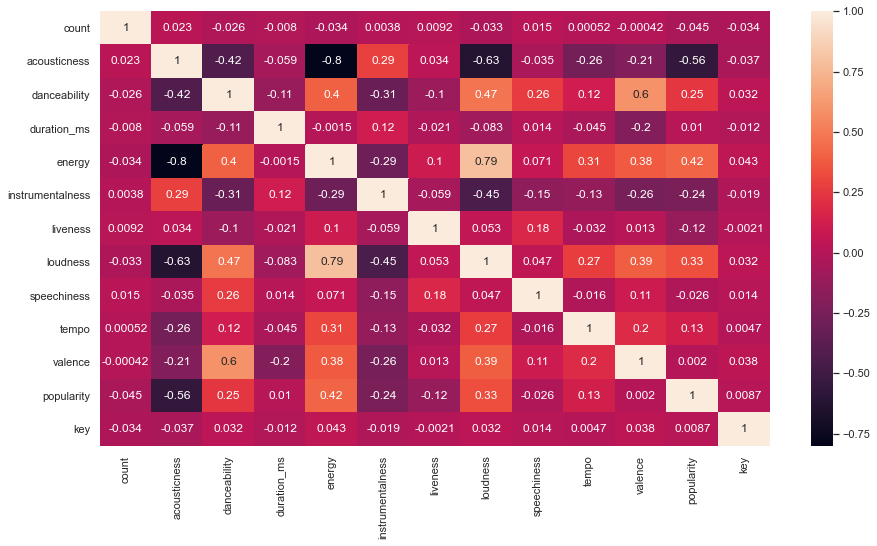

In [16]:
basic_plots(df_artist)

### Reviewing and cleaning df_genre dataframe
From Kaggle Website:

"This file contains the audio features of each genre. The rows represent different genres, and the columns represent different audio features.
(The list of genres associated with each artist are added to the "data_by_artist.csv", and the dataset is grouped by the respective genres. As the result of aggregation process, this data file is created.)"

In [17]:
df_genre.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [18]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [19]:
# Looking for null values in dataset
df_genre.isna().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [20]:
df_genre.shape

(2973, 14)

In [21]:
# Remove unnecessary columns
df_genre = df_genre.drop(labels = ['mode'], axis=1)
df_genre.shape

(2973, 13)

In [22]:
df_genre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


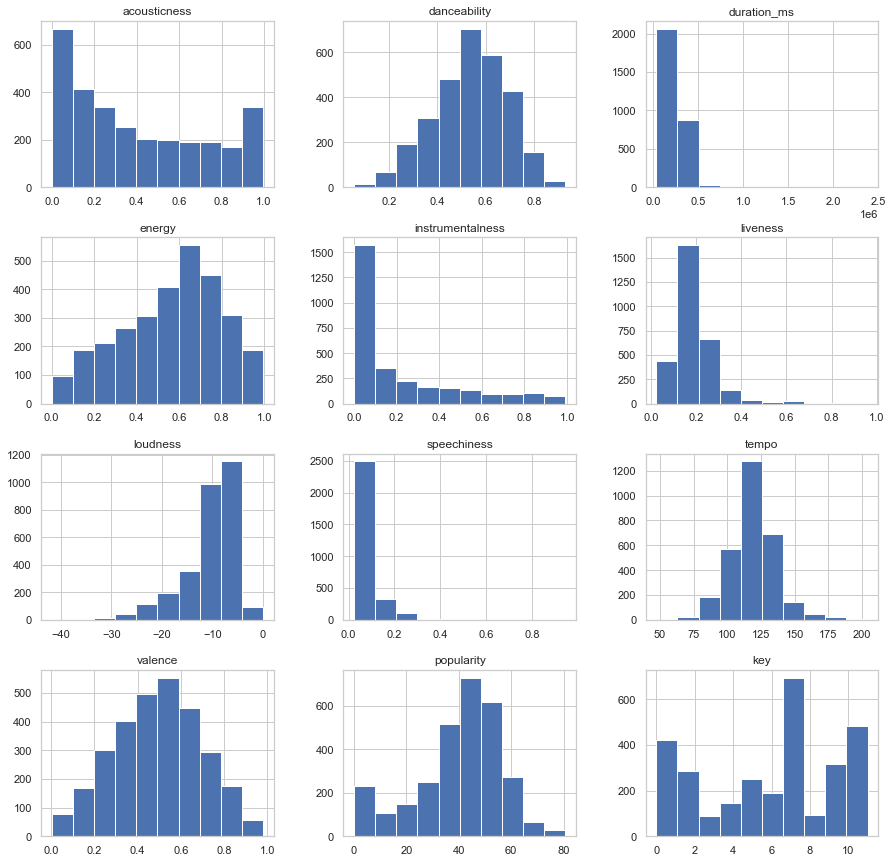

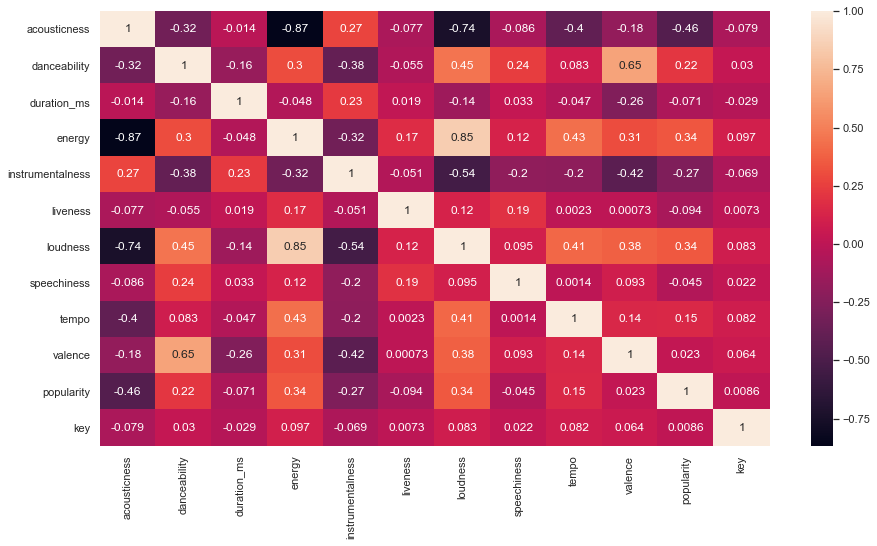

In [23]:
basic_plots(df_genre)

### Reviewing and cleaning df_year dataframe
From Kaggle Website:

"This data file contains the track data grouped by the year of release of each track, and allows time-series operations to be performed. Each row represents a single year, each column represents an audio feature. The bias of data is as minimal as possible."

In [24]:
df_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [25]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [26]:
# Looking for null values in dataset
df_year.isna().sum()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [27]:
df_year.shape

(100, 14)

In [28]:
# Remove unnecessary columns
df_year = df_year.drop(labels = ['mode'], axis=1)
df_year.shape

(100, 13)

In [29]:
df_year.describe()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


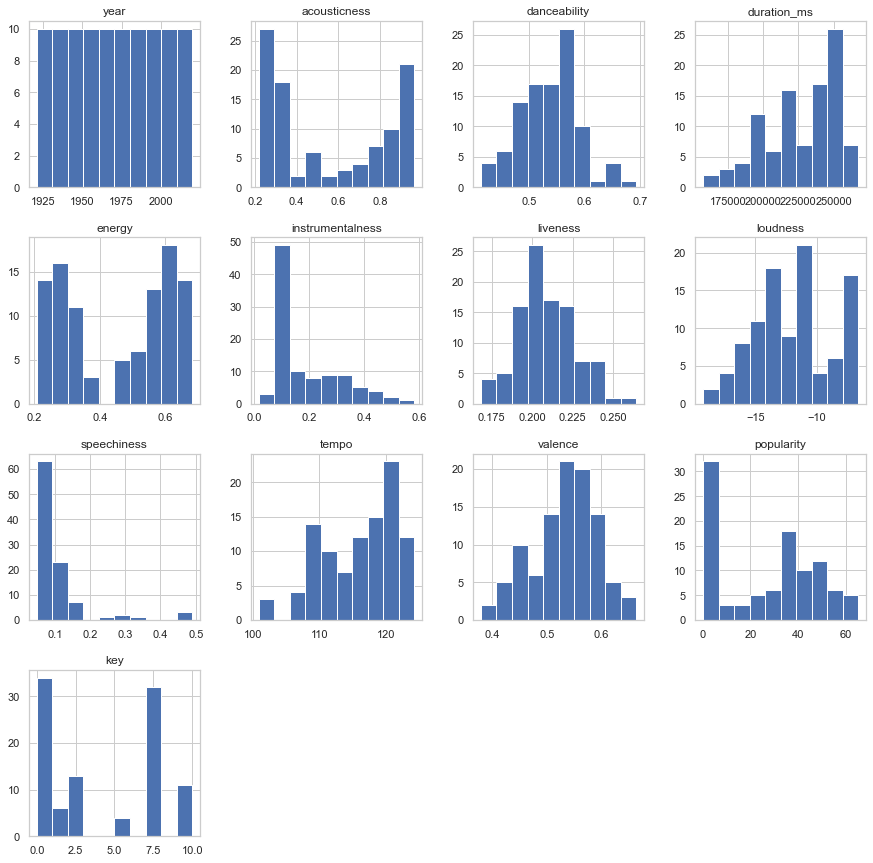

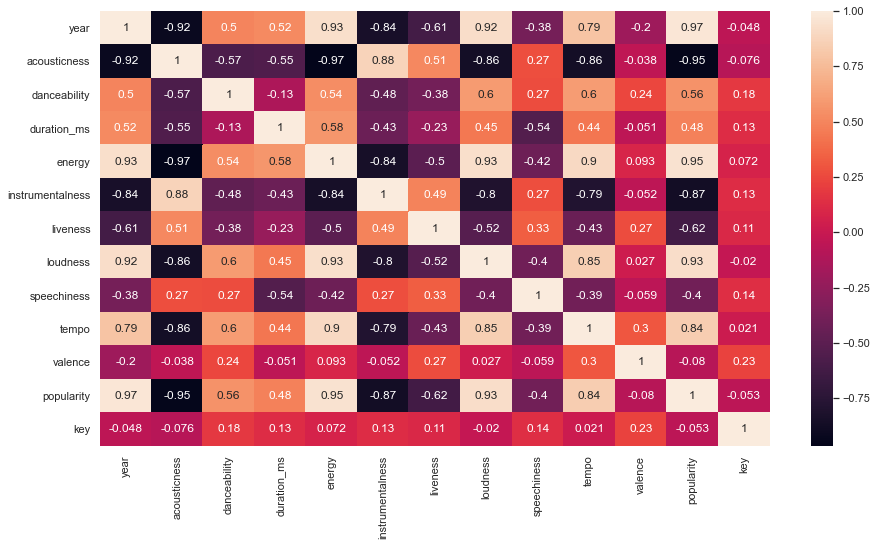

In [30]:
basic_plots(df_year)

### Reviewing and cleaning df_genre_2 dataframe
From Kaggle Website:

"This file is an extension to the "data_by_artist.csv" file with genres implementation for each artist. Each row represents a single artist, each column represents an audio feature.
This data is essential for accomplishing the Recommendation Engine Task if you have decided to build genre-based recommender system."

In [31]:
df_genre_2.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [32]:
df_genre_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [33]:
# Looking for null values in dataset
df_genre_2.isna().sum()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [34]:
df_genre_2.shape

(28680, 16)

In [35]:
# Remove unnecessary columns
df_genre_2 = df_genre_2.drop(labels = ['mode'], axis=1)
df_genre_2.shape

(28680, 15)

In [36]:
df_genre_2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,3169.000000


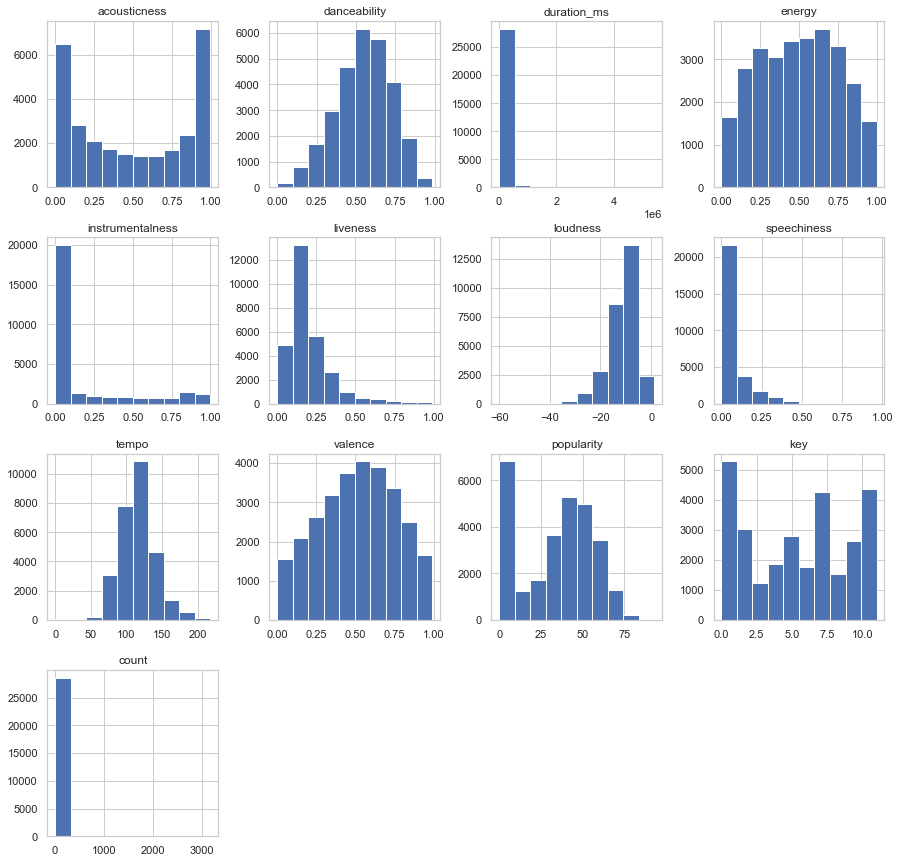

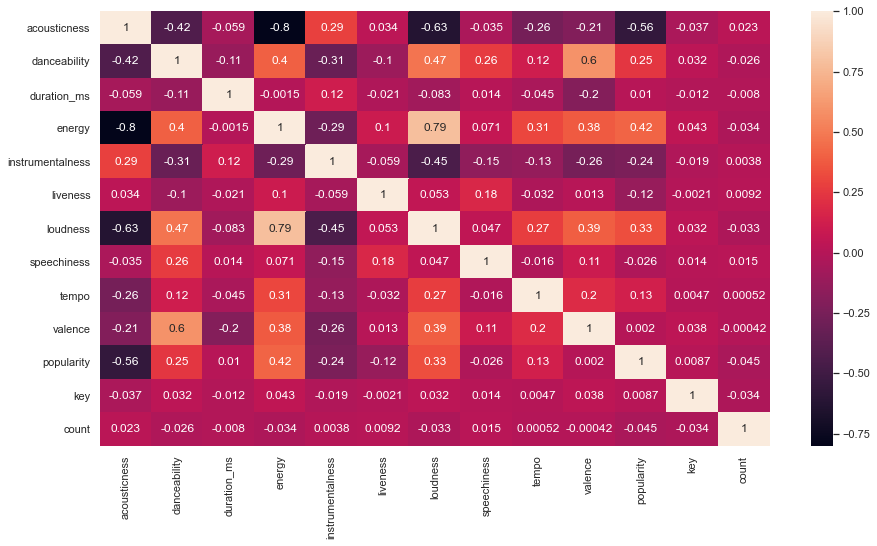

In [37]:
basic_plots(df_genre_2)

<Figure size 1080x576 with 0 Axes>

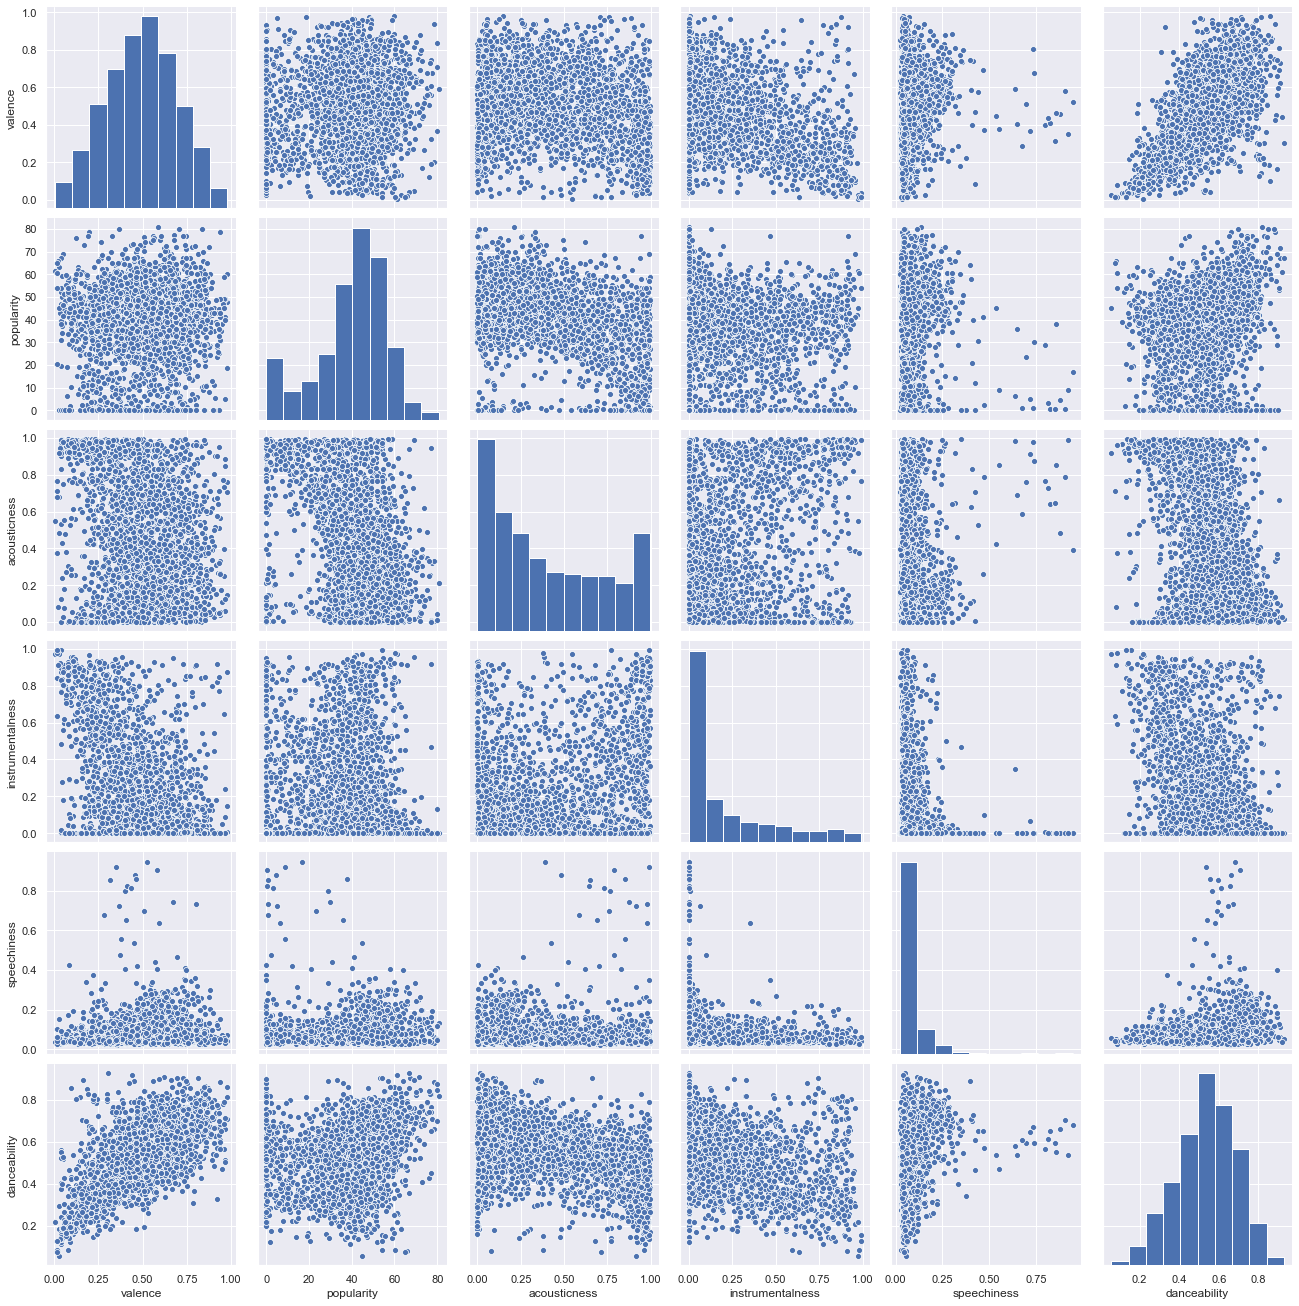

In [80]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")

columns = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df_genre[columns], height=3)
plt.show();

## EDA

In [38]:
df['popularity'].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

### Top 10 most popular tracks

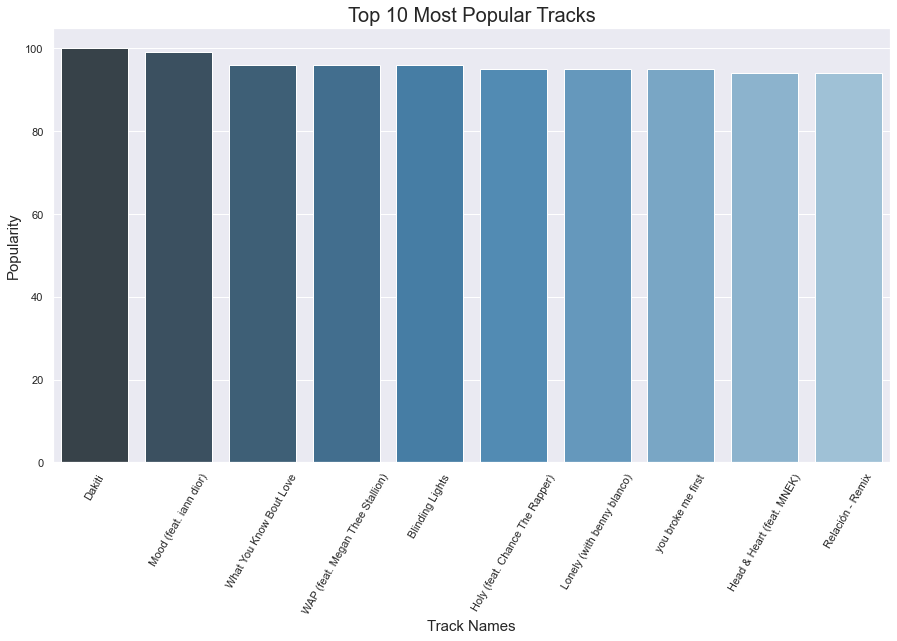

In [49]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")

pop = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(pop.index, pop, palette=("Blues_d"))

ax.set_title('Top 10 Most Popular Tracks', fontsize=20)
ax.set_ylabel('Popularity', fontsize=15)
ax.set_xlabel('Track Names', fontsize=15)

plt.xticks(rotation = 60)
plt.show()

### Top 20 most popular artists

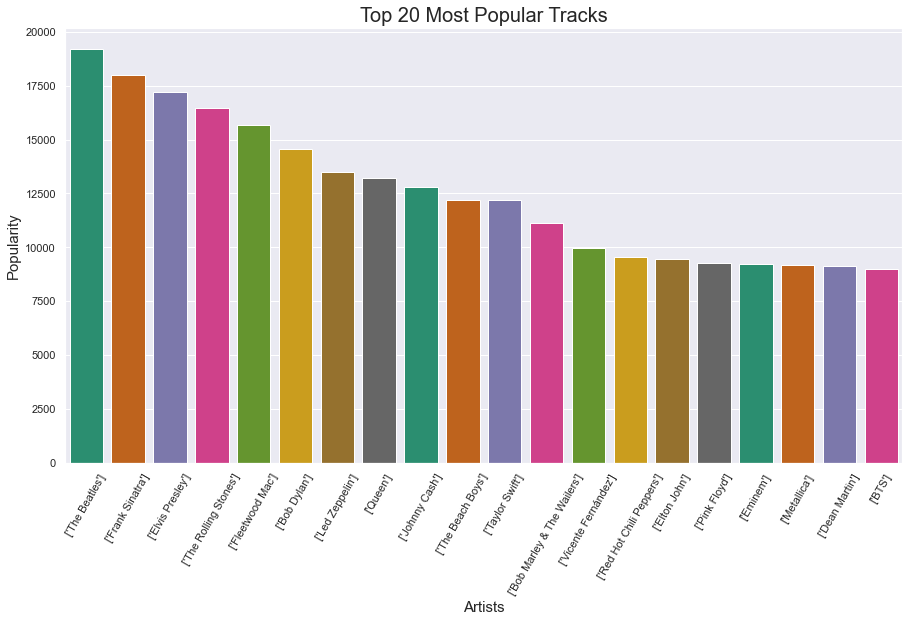

In [53]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")

popart = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(popart.index, popart, palette=("Dark2"))

ax.set_title('Top 20 Most Popular Tracks', fontsize=20)
ax.set_ylabel('Popularity', fontsize=15)
ax.set_xlabel('Artists', fontsize=15)

plt.xticks(rotation = 60)
plt.show()

### Change in audio features over time

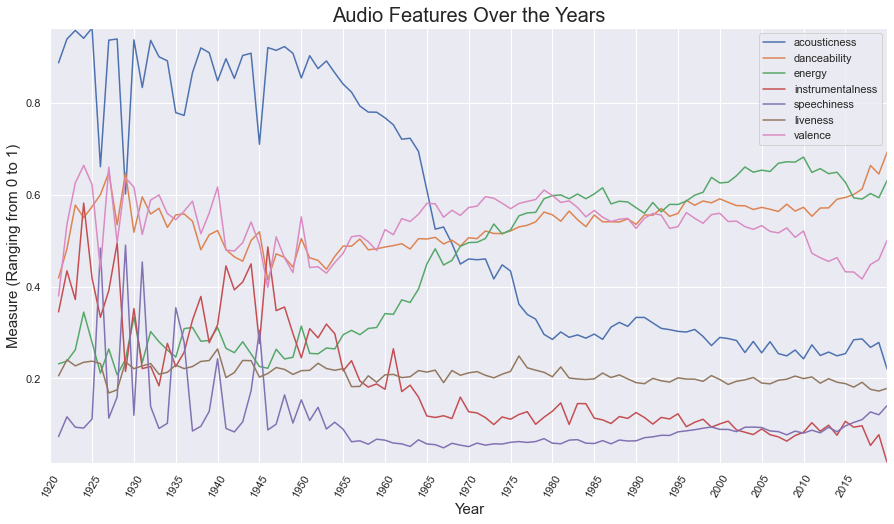

In [71]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid") 
columns = ["acousticness","danceability","energy","instrumentalness","speechiness","liveness","valence"]

for col in columns:
    x = df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col, palette=("Dark2"))
    
ax.set_title('Audio Features Over the Years', fontsize=20)
ax.set_ylabel('Measure (Ranging from 0 to 1)', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

### Change in tempo over time

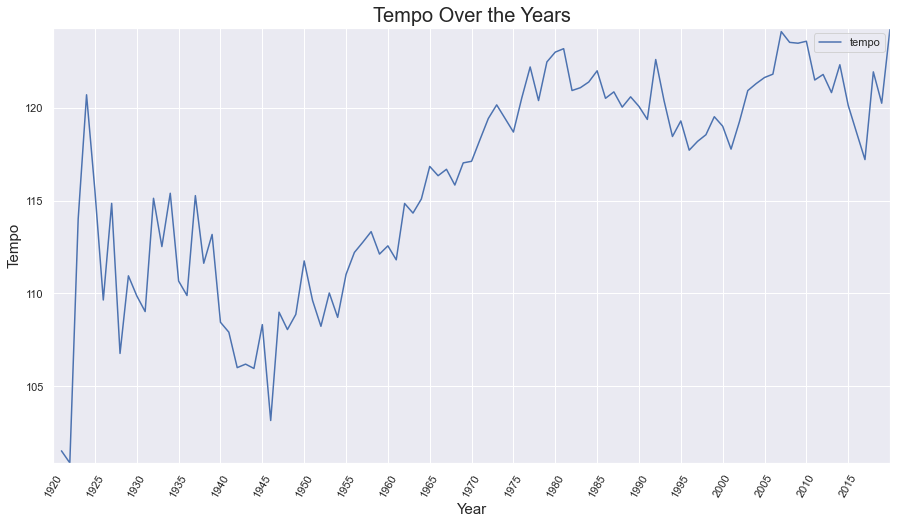

In [92]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")

columns = ["tempo"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Tempo Over the Years', fontsize=20)
ax.set_ylabel('Tempo', fontsize=15)
ax.set_xlabel('Year',  fontsize=15)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

### Energy vs. Acousticness vs. Danceability

In [85]:
dfyear = df.groupby('year').mean().reset_index()

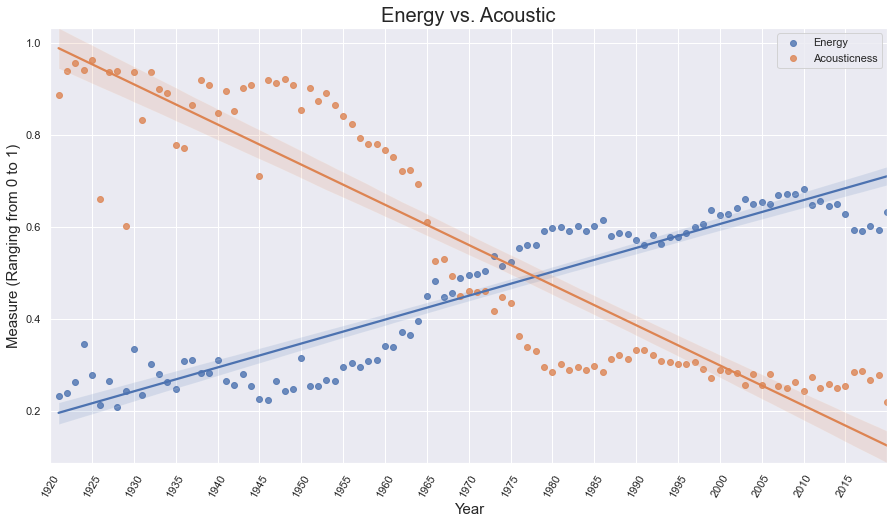

In [93]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(x="year", y="energy", data=dfyear, label="Energy")
sns.regplot(x="year", y="acousticness", data=dfyear, label="Acousticness")
plt.legend()

plt.title('Energy vs. Acoustic', fontsize=20)
plt.ylabel('Measure (Ranging from 0 to 1)', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show();

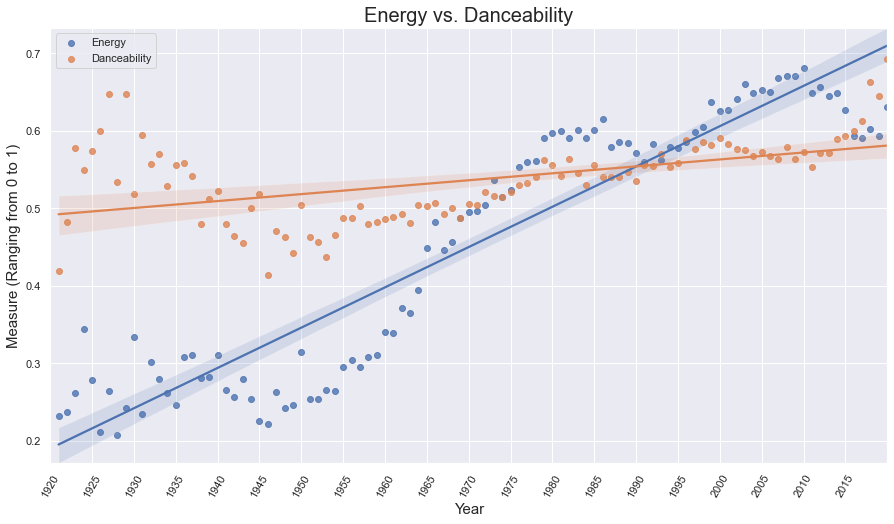

In [95]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(x="year", y="energy", data=dfyear, label="Energy")
sns.regplot(x="year", y="danceability", data=dfyear, label="Danceability")
plt.legend()

plt.title('Energy vs. Danceability', fontsize=20)
plt.ylabel('Measure (Ranging from 0 to 1)', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show();